## Installing Libraries

In [ ]:
!pip install catboost
!pip install pandas-summary
!pip install optuna
!pip install pycaret
!pip install --upgrade numpy scikit-learn pycaret

  Using cached numpy-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as sio
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from numpy import absolute
from numpy import sqrt
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
#from sklearn.inspection import plot_partial_dependence
#from sklearn.metrics import classification_report, recall_score, plot_confusion_matrix, plot_precision_recall_curve, roc_curve
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
#import matplotlib as mlp
#from matplotlib import Artist
#from matplotlib.artist import Artist
#import seaborn as sns
import warnings
import optuna
from optuna.samplers import TPESampler
from tqdm import tqdm
#from pycaret.classification import *

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Loading the Dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving b_depressed.csv to b_depressed.csv


In [ ]:
import pandas as pd

data = pd.read_csv('b_depressed.csv')
data.head(10)

Survey_id  Ville_id  sex  Age  Married  Number_children  education_level  \
0        926        91    1   28        1                4               10   
1        747        57    1   23        1                3                8   
2       1190       115    1   22        1                3                9   
3       1065        97    1   27        1                2               10   
4        806        42    0   59        0                4               10   
5        483        25    1   35        1                6               10   
6        849       130    0   34        0                1                9   
7       1386        72    1   21        1                2               10   
8        930       195    1   32        1                7                9   
9        390        33    1   29        1                4               10   

   total_members  gained_asset  durable_asset  ...  incoming_salary  \
0              5      28912201       22861940  ...                0   
1              5      28912201       22861940  ...                0   
2              5      28912201       22861940  ...                0   
3              4      52667108       19698904  ...                0   
4              6      82606287       17352654  ...                1   
5              8      35937466         736707  ...                0   
6              3      41303144       21925041  ...                0   
7              4      12013633       20323505  ...                0   
8              9      11087568       25224208  ...                1   
9              5      28912201       22861940  ...                0   

   incoming_own_farm  incoming_business  incoming_no_business  \
0                  0                  0                     0   
1                  0                  0                     0   
2                  0                  0                     0   
3                  1                  0                     1   
4                  0                  0                     0   
5                  1                  0                     1   
6                  0                  0                     0   
7                  0                  1                     0   
8                  0                  0                     0   
9                  0                  0                     0   

   incoming_agricultural  farm_expenses  labor_primary  lasting_investment  \
0               30028818       31363432              0            28411718   
1               30028818       31363432              0            28411718   
2               30028818       31363432              0            28411718   
3               22288055       18751329              0             7781123   
4               53384566       20731006              1            20100562   
5               22688441       18907036              0             4442561   
6               26692283       22243569              0            22562288   
7                9275569       36979933              0            33922659   
8               32564587       28738691              1            14018381   
9               30028818       31363432              0            28411718   

   no_lasting_investmen  depressed  
0            28292707.0          0  
1            28292707.0          1  
2            28292707.0          0  
3            69219765.0          0  
4            43419447.0          0  
5            76629095.0          0  
6            55608922.0          1  
7            54600174.0          0  
8            15117619.0          0  
9            28292707.0          0  

[10 rows x 23 columns]

## Exploratory Data Analysis

In [ ]:
print (data.shape)

(1429, 23)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [ ]:
data.describe()

Survey_id     Ville_id          sex          Age      Married  \
count  1429.00000  1429.000000  1429.000000  1429.000000  1429.000000   
mean    715.00000    76.286214     0.918125    34.777467     0.772568   
std     412.66108    66.444012     0.274271    13.986219     0.419320   
min       1.00000     1.000000     0.000000    17.000000     0.000000   
25%     358.00000    24.000000     1.000000    25.000000     1.000000   
50%     715.00000    57.000000     1.000000    30.000000     1.000000   
75%    1072.00000   105.000000     1.000000    42.000000     1.000000   
max    1429.00000   292.000000     1.000000    91.000000     1.000000   

       Number_children  education_level  total_members  gained_asset  \
count      1429.000000      1429.000000    1429.000000  1.429000e+03   
mean          2.883135         8.687194       4.969209  3.363448e+07   
std           1.874472         2.923532       1.786317  2.003854e+07   
min           0.000000         1.000000       1.000000  3.251120e+05   
25%           2.000000         8.000000       4.000000  2.326982e+07   
50%           3.000000         9.000000       5.000000  2.891220e+07   
75%           4.000000        10.000000       6.000000  3.717283e+07   
max          11.000000        19.000000      12.000000  9.912755e+07   

       durable_asset  ...  incoming_salary  incoming_own_farm  \
count   1.429000e+03  ...      1429.000000        1429.000000   
mean    2.717296e+07  ...         0.179846           0.251924   
std     1.815672e+07  ...         0.384194           0.434270   
min     1.625560e+05  ...         0.000000           0.000000   
25%     1.929852e+07  ...         0.000000           0.000000   
50%     2.286194e+07  ...         0.000000           0.000000   
75%     2.656950e+07  ...         0.000000           1.000000   
max     9.961560e+07  ...         1.000000           1.000000   

       incoming_business  incoming_no_business  incoming_agricultural  \
count        1429.000000           1429.000000           1.429000e+03   
mean            0.107768              0.260322           3.451039e+07   
std             0.310195              0.438964           2.077846e+07   
min             0.000000              0.000000           3.251120e+05   
25%             0.000000              0.000000           2.322229e+07   
50%             0.000000              0.000000           3.002882e+07   
75%             0.000000              1.000000           4.003842e+07   
max             1.000000              1.000000           9.978910e+07   

       farm_expenses  labor_primary  lasting_investment  no_lasting_investmen  \
count   1.429000e+03    1429.000000        1.429000e+03          1.409000e+03   
mean    3.549153e+07       0.213436        3.299222e+07          3.360385e+07   
std     2.112372e+07       0.409876        2.121621e+07          2.160228e+07   
min     2.715050e+05       0.000000        7.429200e+04          1.263120e+05   
25%     2.279966e+07       0.000000        2.001911e+07          2.064203e+07   
50%     3.136343e+07       0.000000        2.841172e+07          2.829271e+07   
75%     4.348584e+07       0.000000        3.982686e+07          4.151762e+07   
max     9.965119e+07       1.000000        9.944667e+07          9.965119e+07   

         depressed  
count  1429.000000  
mean      0.166550  
std       0.372704  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 23 columns]

In [ ]:
data.head(5)

Survey_id  Ville_id  sex  Age  Married  Number_children  education_level  \
0        926        91    1   28        1                4               10   
1        747        57    1   23        1                3                8   
2       1190       115    1   22        1                3                9   
3       1065        97    1   27        1                2               10   
4        806        42    0   59        0                4               10   

   total_members  gained_asset  durable_asset  ...  incoming_salary  \
0              5      28912201       22861940  ...                0   
1              5      28912201       22861940  ...                0   
2              5      28912201       22861940  ...                0   
3              4      52667108       19698904  ...                0   
4              6      82606287       17352654  ...                1   

   incoming_own_farm  incoming_business  incoming_no_business  \
0                  0                  0                     0   
1                  0                  0                     0   
2                  0                  0                     0   
3                  1                  0                     1   
4                  0                  0                     0   

   incoming_agricultural  farm_expenses  labor_primary  lasting_investment  \
0               30028818       31363432              0            28411718   
1               30028818       31363432              0            28411718   
2               30028818       31363432              0            28411718   
3               22288055       18751329              0             7781123   
4               53384566       20731006              1            20100562   

   no_lasting_investmen  depressed  
0            28292707.0          0  
1            28292707.0          1  
2            28292707.0          0  
3            69219765.0          0  
4            43419447.0          0  

[5 rows x 23 columns]

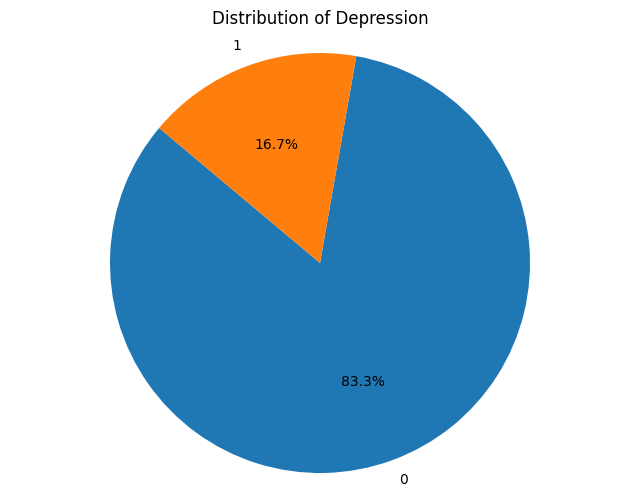

In [ ]:
# Counting categories in 'depressed' column
depressed_count = data['depressed'].value_counts()

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(depressed_count, labels=depressed_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Depression')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
df_majority = data[data.depressed==0]
df_minority = data[data.depressed==1]
print(df_majority.shape)
print(df_minority.shape)

(1191, 23)
(238, 23)


In [ ]:
df_manjority_downsampled = resample(df_majority,replace=True,n_samples=810,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.depressed.value_counts()) # Changed 'MS' to 'depressed'

#Here we are upsampling the Minority Class Data Points.
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_monority_upsampled = resample(df_minority,replace=True,n_samples=1510,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.depressed.value_counts()) # Changed 'MS' to 'depressed'

Downsampled data:->
 depressed
0    810
1    238
Name: count, dtype: int64
Upsampled data:->
 depressed
1    1510
0    1191
Name: count, dtype: int64


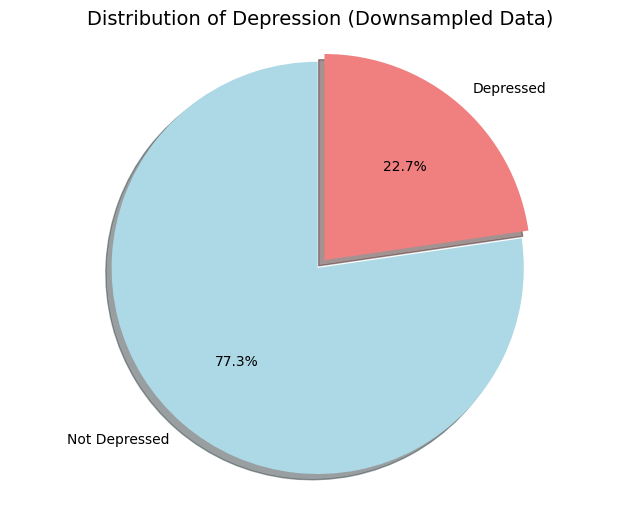

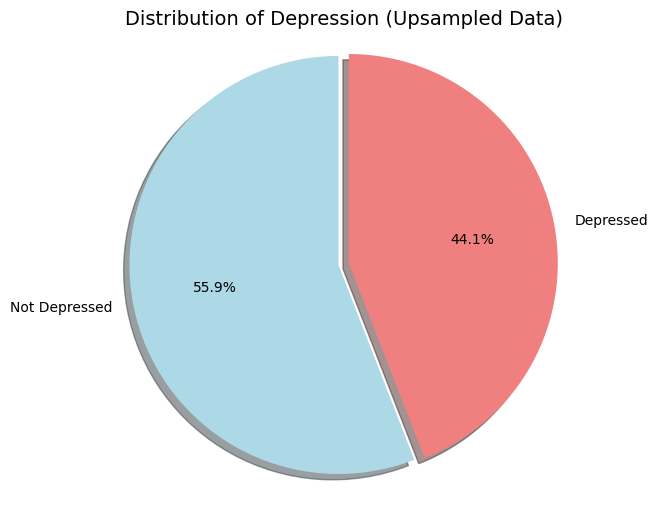

In [ ]:
import matplotlib.pyplot as plt

# Downsampled Data Pie Chart
depressed_count_downsampled = df_downsampled['depressed'].value_counts()
labels_downsampled = ['Not Depressed', 'Depressed']

plt.figure(figsize=(8, 6))
plt.pie(depressed_count_downsampled, labels=labels_downsampled, autopct='%1.1f%%', startangle=90,
        colors=['lightblue', 'lightcoral'], explode=[0.05, 0], shadow=True)
plt.title('Distribution of Depression (Downsampled Data)', fontsize=14)
plt.axis('equal')
plt.show()

# Upsampled Data Pie Chart
depressed_count_upsampled = df_upsampled['depressed'].value_counts()
labels_upsampled = ['Not Depressed', 'Depressed']

plt.figure(figsize=(8, 6))
plt.pie(depressed_count_upsampled, labels=labels_upsampled, autopct='%1.1f%%', startangle=90,
        colors=['lightblue', 'lightcoral'], explode=[0.05, 0], shadow=True)
plt.title('Distribution of Depression (Upsampled Data)', fontsize=14)
plt.axis('equal')
plt.show()

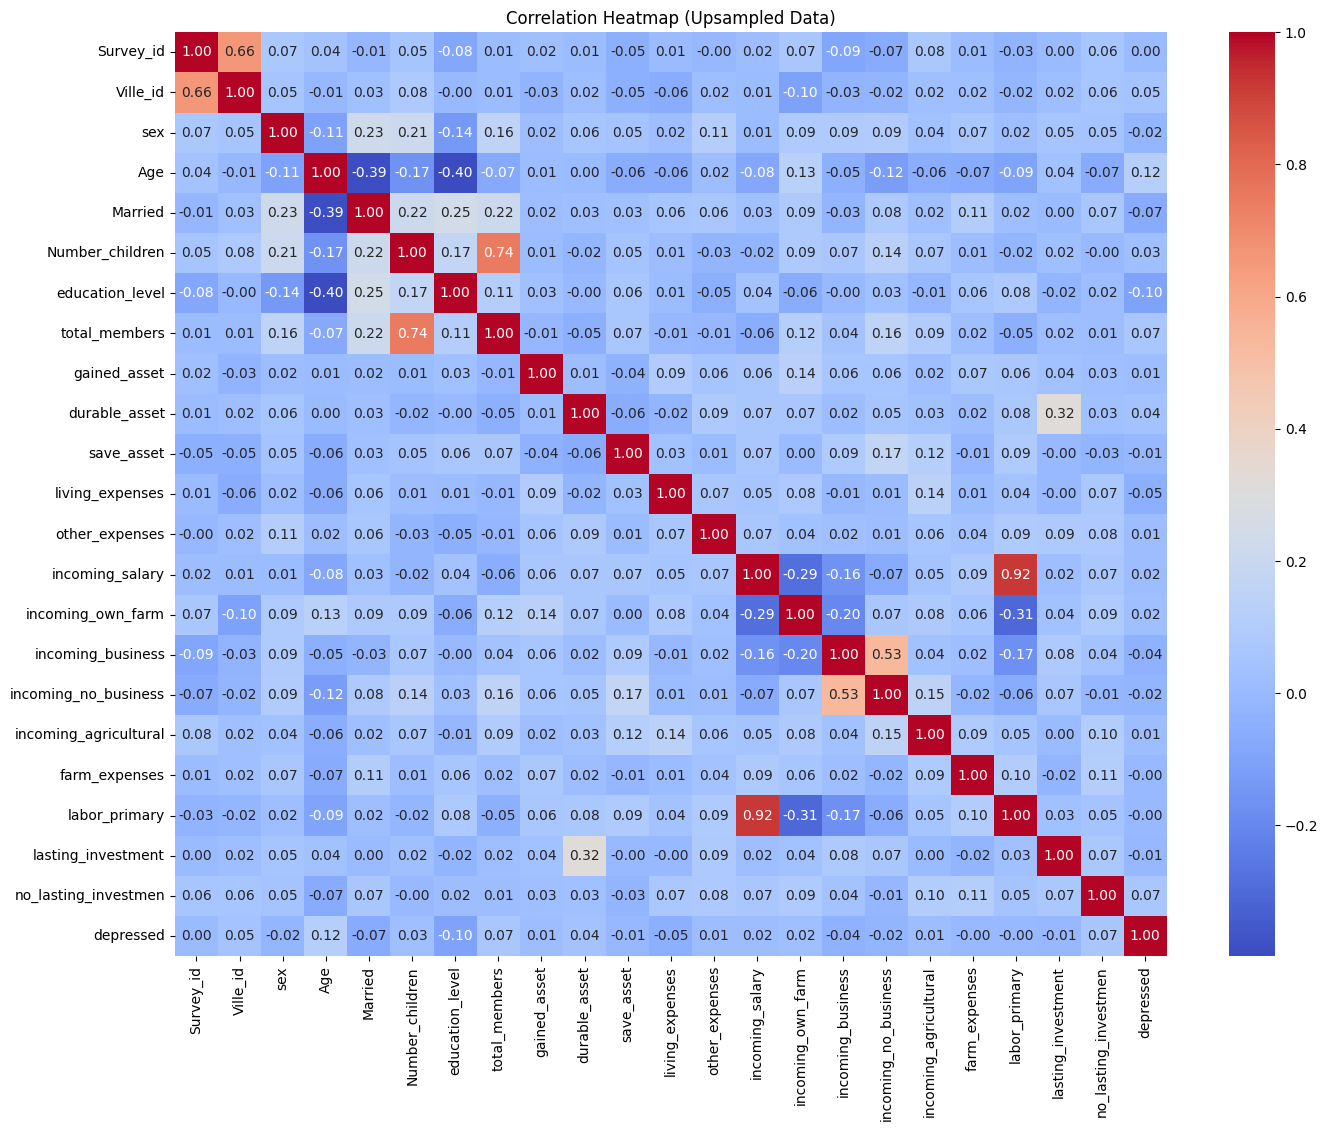

In [ ]:
# Upsampled Data Correlation Heatmap
correlation_matrix_upsampled = df_upsampled.corr()  # Calculate correlation for upsampled data

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_upsampled, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Upsampled Data)')
plt.show()

# Downsampled Data Correlation Heatmap
#correlation_matrix_downsampled = df_downsampled.corr()  # Calculate correlation for downsampled data

#plt.figure(figsize=(16, 12))
#sns.heatmap(correlation_matrix_downsampled, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Heatmap (Downsampled Data)')
#plt.show()

In [ ]:
#df=df.iloc[:,2:]
# Remove unnecessary columns
data = data.drop(['Survey_id','Ville_id',], axis=1)

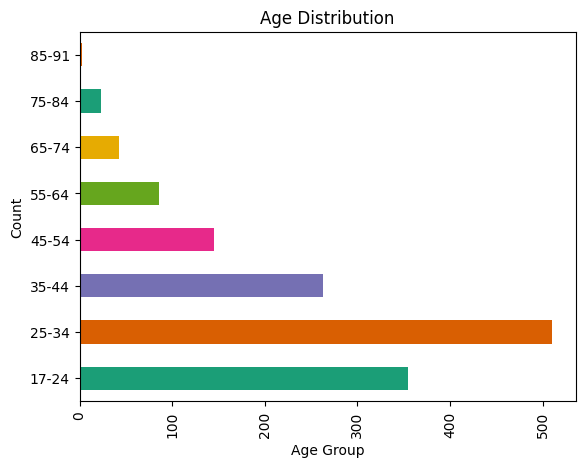

In [ ]:
# Define the bins and labels for the age ranges
bins = [17, 25, 35, 45, 55, 65, 75, 85, 91]
labels = ['17-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-91']

# Create a new column 'Age Group' with the binned values
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Optionally, you can visualize the age distribution using a bar plot
age_group_counts = data['Age Group'].value_counts().sort_index()
age_group_counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Preprocessing

In [ ]:
data.isnull().sum()

sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
Age Group                 1
dtype: int64

In [ ]:
# Remove rows with any null values
data = data.dropna()

In [ ]:
data.isnull().sum()

sex                      0
Age                      0
Married                  0
Number_children          0
education_level          0
total_members            0
gained_asset             0
durable_asset            0
save_asset               0
living_expenses          0
other_expenses           0
incoming_salary          0
incoming_own_farm        0
incoming_business        0
incoming_no_business     0
incoming_agricultural    0
farm_expenses            0
labor_primary            0
lasting_investment       0
no_lasting_investmen     0
depressed                0
Age Group                0
dtype: int64

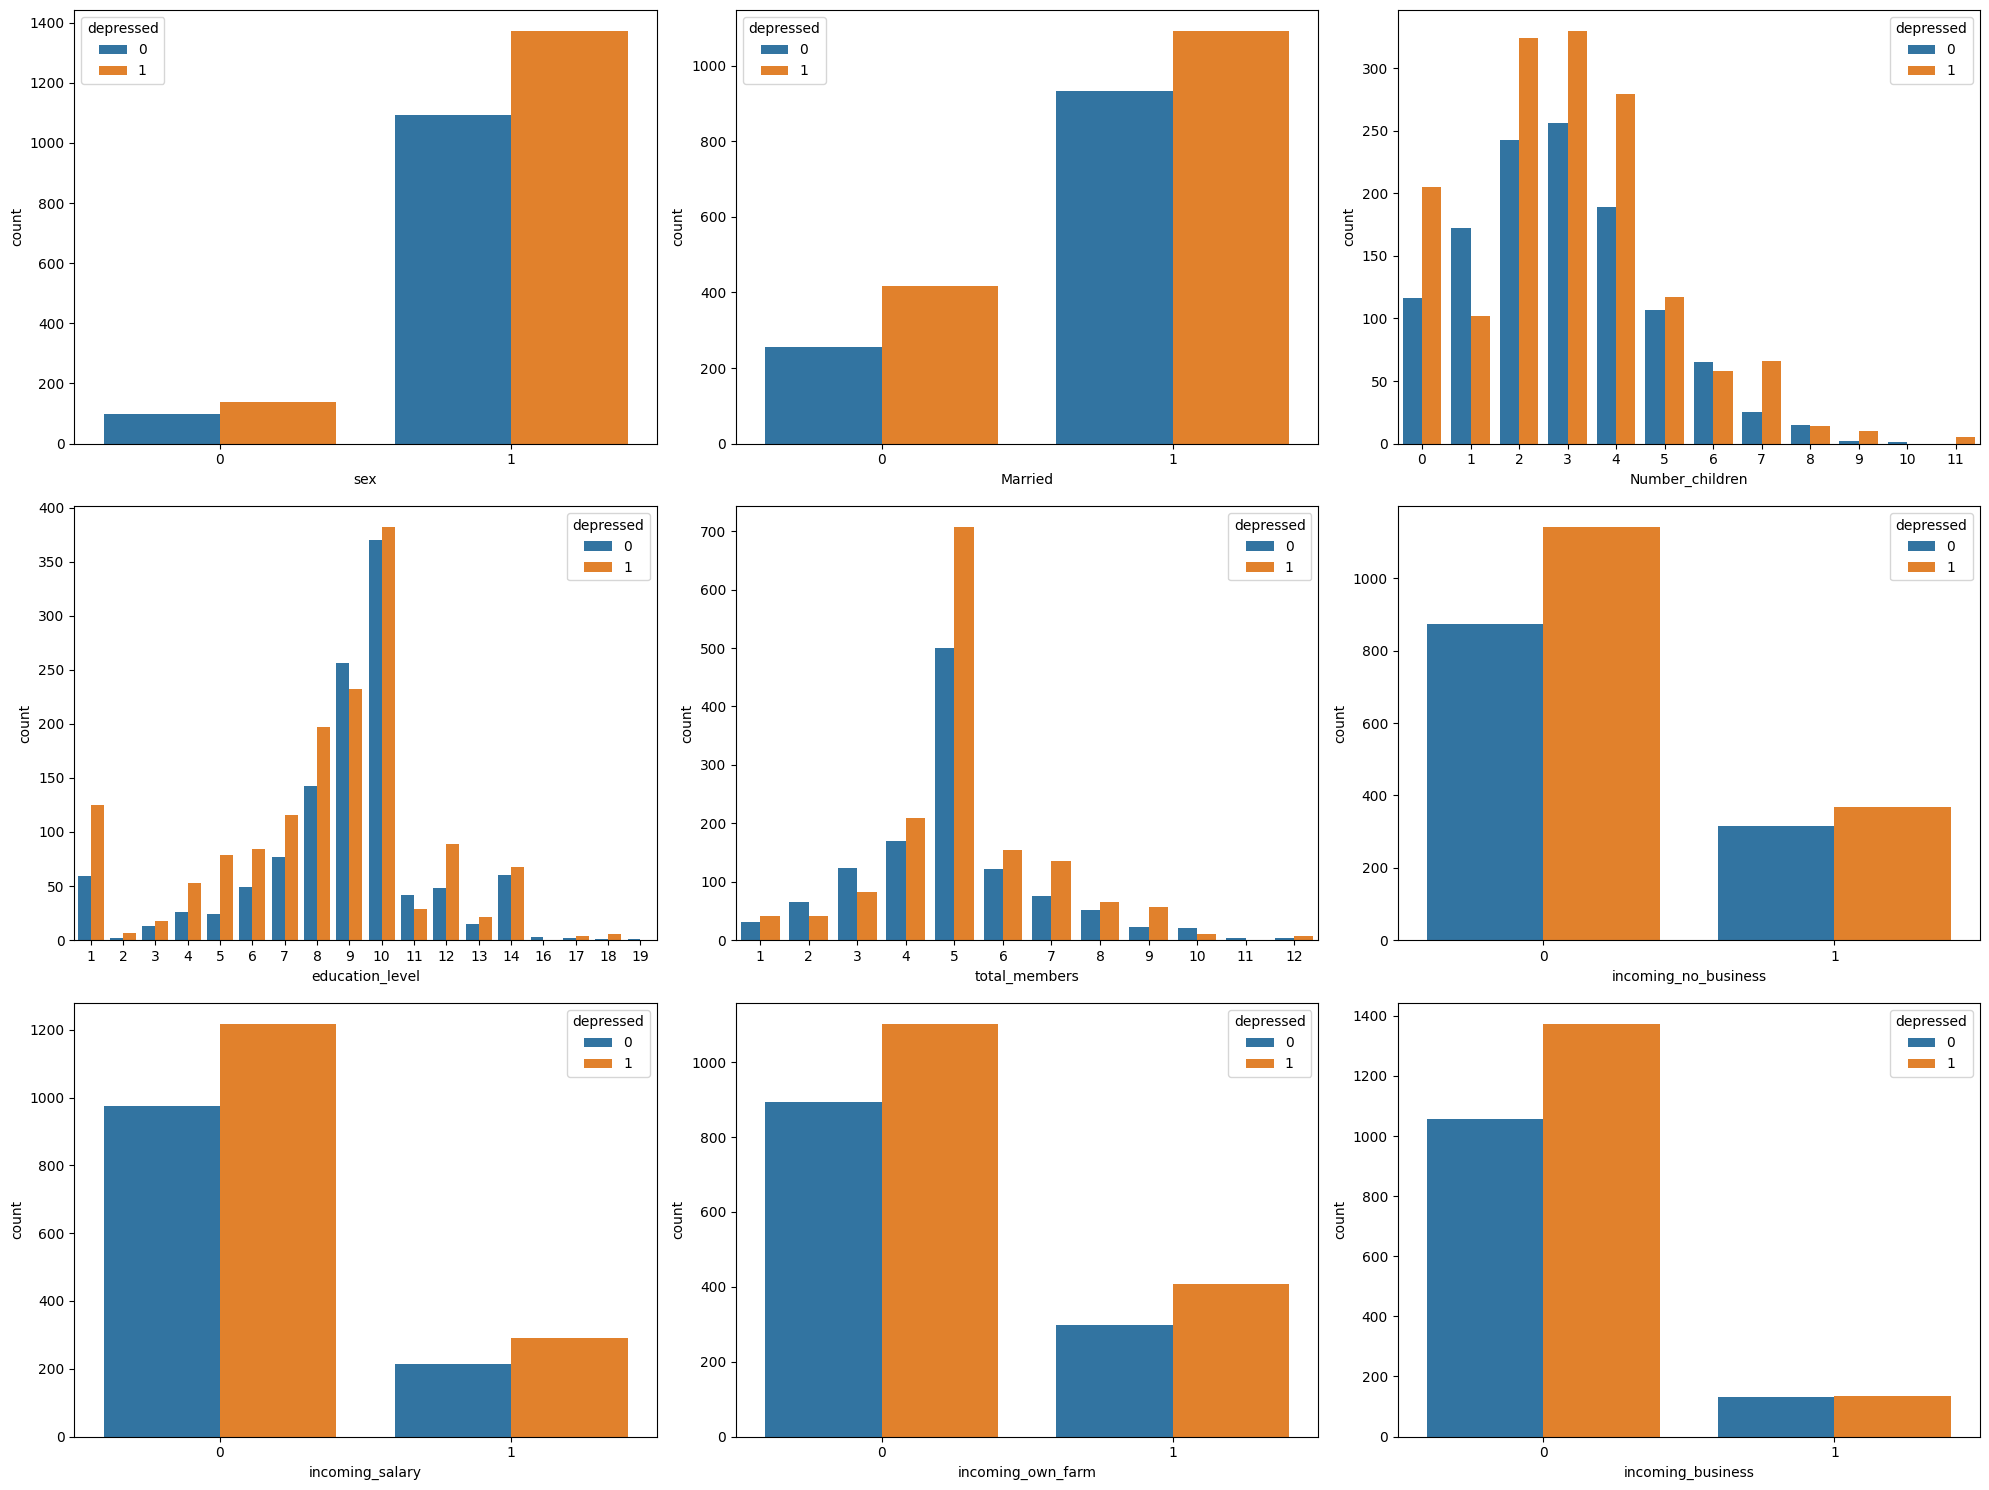

In [ ]:
plt.figure(figsize=(20, 15))

plt.subplot(3, 3, 1)
sns.countplot(x='sex', hue='depressed', data=df_upsampled)  # Changed to df_upsampled
plt.subplot(3, 3, 2)
sns.countplot(x='Married', hue='depressed', data=df_upsampled)  # Changed to df_upsampled
plt.subplot(3, 3, 3)
sns.countplot(x='Number_children', hue='depressed', data=df_upsampled)  # Changed to df_upsampled

plt.subplot(3, 3, 4)
sns.countplot(x='education_level', hue='depressed', data=df_upsampled)  # Changed to df_upsampled
plt.subplot(3, 3, 5)
sns.countplot(x='total_members', hue='depressed', data=df_upsampled)  # Changed to df_upsampled
plt.subplot(3, 3, 6)
sns.countplot(x='incoming_no_business', hue='depressed', data=df_upsampled)  # Changed to df_upsampled

plt.subplot(3, 3, 7)
sns.countplot(x='incoming_salary', hue='depressed', data=df_upsampled)  # Changed to df_upsampled
plt.subplot(3, 3, 8)
sns.countplot(x='incoming_own_farm', hue='depressed', data=df_upsampled)  # Changed to df_upsampled
plt.subplot(3, 3, 9)
sns.countplot(x='incoming_business', hue='depressed', data=df_upsampled)  # Changed to df_upsampled

plt.tight_layout()
plt.show()

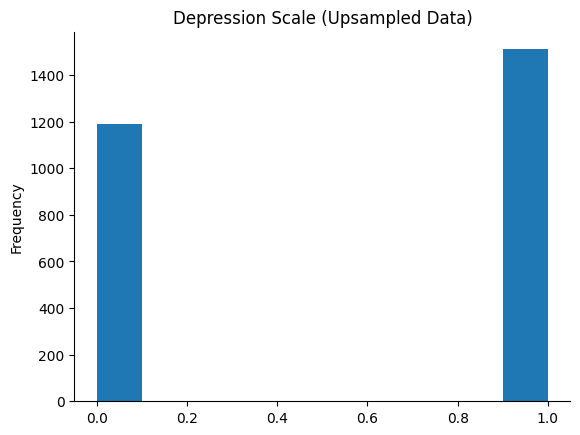

In [ ]:
from matplotlib import pyplot as plt

df_upsampled['depressed'].plot(kind='hist', title='Depression Scale (Upsampled Data)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

### Performing Cramer's V and Chi-Squared Test for find out the influence of Independent categorical variables on the depended variable (Depression Scale).

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Check data types
print("Data Types:\n", df_upsampled.dtypes)  # Changed to df_upsampled

# Identify categorical columns
categorical_cols = df_upsampled.select_dtypes(include=['object']).columns.tolist()  # Changed to df_upsampled
print("Categorical Columns:", categorical_cols)

dependent_variable = 'depressed'

# Check if dependent variable is categorical
if dependent_variable not in categorical_cols:
    print(f"'{dependent_variable}' is not a categorical column. Please check its data type.")
else:
    categorical_cols.remove(dependent_variable)  # Remove dependent variable if it's categorical

results = []
for col in categorical_cols:
    # Check for missing values
    if df_upsampled[col].isnull().any() or df_upsampled[dependent_variable].isnull().any():  # Changed to df_upsampled
        print(f"Missing values found in {col} or {dependent_variable}.")
        continue  # Skip this column if there are missing values

    # Perform Cramer's V test
    cramers = cramers_v(df_upsampled[col], df_upsampled[dependent_variable])  # Changed to df_upsampled

    # Perform Chi-Squared test
    contingency_table = pd.crosstab(df_upsampled[col], df_upsampled[dependent_variable])  # Changed to df_upsampled
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    results.append({
        'Independent Variable': col,
        "Cramer's V": cramers,
        'Chi-Squared Statistic': chi2_stat,
        'P-value': p_value
    })

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display results
print(results_df)

Data Types:
 Survey_id                  int64
Ville_id                   int64
sex                        int64
Age                        int64
Married                    int64
Number_children            int64
education_level            int64
total_members              int64
gained_asset               int64
durable_asset              int64
save_asset                 int64
living_expenses            int64
other_expenses             int64
incoming_salary            int64
incoming_own_farm          int64
incoming_business          int64
incoming_no_business       int64
incoming_agricultural      int64
farm_expenses              int64
labor_primary              int64
lasting_investment         int64
no_lasting_investmen     float64
depressed                  int64
dtype: object
Categorical Columns: []
'depressed' is not a categorical column. Please check its data type.
Empty DataFrame
Columns: []
Index: []


## Finding distinct values in categorical data to label encode them.

In [ ]:
# Identify categorical features in upsampled data
categorical_features = df_upsampled.select_dtypes(include=['object']).columns

# Iterate through categorical features and print distinct values
for feature in categorical_features:
    distinct_values = df_upsampled[feature].unique()
    print(f"Feature: {feature}")
    print(f"Distinct Values: {distinct_values}")
    print("-" * 20)

In [ ]:
categorical_features

Index([], dtype='object')

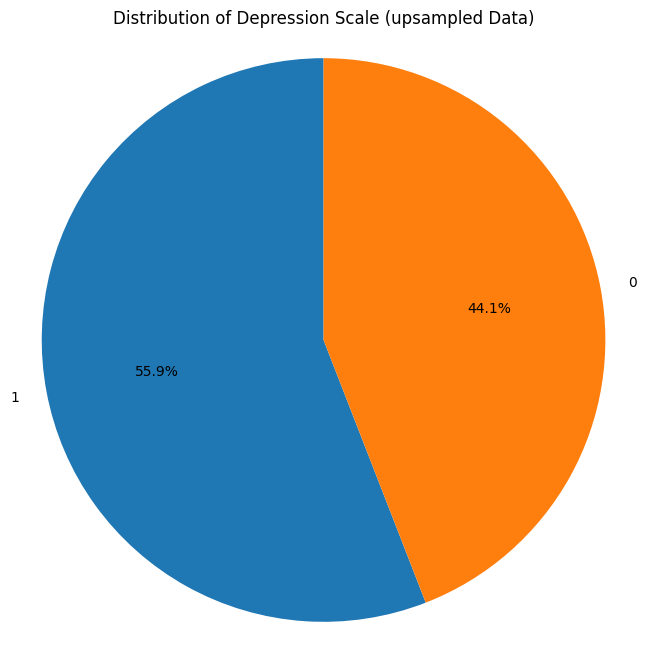

In [ ]:
depression_scale_counts = df_upsampled['depressed'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(depression_scale_counts, labels=depression_scale_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Depression Scale (upsampled Data)')
plt.axis('equal')
plt.show()

In [ ]:
import pycaret
print(pycaret.__version__)

3.3.2


In [ ]:
from pycaret.classification import *

In [ ]:
from pycaret.classification import setup

# Separate features and target variable from upsampled data
X = df_upsampled.drop('depressed', axis=1)
y = df_upsampled['depressed']

# Set up the PyCaret Environment using upsampled data
clf_setup = setup(data=df_upsampled,  # Pass the upsampled DataFrame
                  target='depressed',
                  session_id=42,
                  preprocess=True,
                  normalize=True,
                  transformation=True,
                  index=False,
                  verbose=True)

In [ ]:
# Running the PyCaret Environment and Selecting Top 5 models on the basis of Accuracy score
print('comparing models for Depression data and selecting top 5 out of them based on accuracy score')
top_model = compare_models(n_select=5, sort='Accuracy')

comparing models for Depression data and selecting top 5 out of them based on accuracy score


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

In [ ]:
print("Top 5 Models are:")
for model in top_model:
  print(type(model).__name__)

Top 5 Models are:
ExtraTreesClassifier
RandomForestClassifier
DecisionTreeClassifier
XGBClassifier
LGBMClassifier


In [ ]:
from pycaret.classification import blend_models, stack_models

# Instead of 'predict_proba', use 'predict' for the method
stacked_model = stack_models(estimator_list=top_model,
                             meta_model=LogisticRegression(),
                             fold=5,
                             method='predict') # Changed to 'predict'

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# Evaluate the stacker model
print(stacked_model)
evaluate_model(stacked_model)

StackingClassifier(cv=5,
                   estimators=[('Extra Trees Classifier',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                      

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Finalize the stacker model
final_stacked = finalize_model(stacked_model)
final_stacked

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Survey_id', 'Ville_id', 'sex',
                                             'Age', 'Married',
                                             'Number_children',
                                             'education_level', 'total_members',
                                             'gained_asset', 'durable_asset',
                                             'save_asset', 'living_expenses',
                                             'other_expenses',
                                             'incoming_salary',
                                             'incoming_own_farm',
                                             'incoming_business',
                                             'incoming...
                                                                subsample_freq=0))],
                                    final_estimator=LogisticRegression(C=1.0,
                                                                       class_weight=None,
                                                                       dual=False,
                                                                       fit_intercept=True,
                                                                       intercept_scaling=1,
                                                                       l1_ratio=None,
                                                                       max_iter=100,
                                                                       multi_class='auto',
                                                                       n_jobs=None,
                                                                       penalty='l2',
                                                                       random_state=None,
                                                                       solver='lbfgs',
                                                                       tol=0.0001,
                                                                       verbose=0,
                                                                       warm_start=False),
                                    n_jobs=-1, passthrough=False,
                                    stack_method='predict', verbose=0))],
         verbose=False)

## Implementing SHAP XAI Shapley Additive exPlanations

In [ ]:
!pip install shap
import shap

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Train your model (using the final_stacked model from your previous code)
final_stacked.fit(X_train, y_train)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Survey_id', 'Ville_id', 'sex',
                                             'Age', 'Married',
                                             'Number_children',
                                             'education_level', 'total_members',
                                             'gained_asset', 'durable_asset',
                                             'save_asset', 'living_expenses',
                                             'other_expenses',
                                             'incoming_salary',
                                             'incoming_own_farm',
                                             'incoming_business',
                                             'incoming...
                                                                subsample_freq=0))],
                                    final_estimator=LogisticRegression(C=1.0,
                                                                       class_weight=None,
                                                                       dual=False,
                                                                       fit_intercept=True,
                                                                       intercept_scaling=1,
                                                                       l1_ratio=None,
                                                                       max_iter=100,
                                                                       multi_class='auto',
                                                                       n_jobs=None,
                                                                       penalty='l2',
                                                                       random_state=None,
                                                                       solver='lbfgs',
                                                                       tol=0.0001,
                                                                       verbose=0,
                                                                       warm_start=False),
                                    n_jobs=-1, passthrough=False,
                                    stack_method='predict', verbose=0))],
         verbose=False)

In [ ]:
# Explain the model's predictions using SHAP
explainer = shap.Explainer(final_stacked.predict, X_train)
shap_values = explainer(X_test)

PermutationExplainer explainer: 812it [30:25,  2.26s/it]


In [ ]:
from sklearn.preprocessing import OrdinalEncoder  # Import OrdinalEncoder

# ... (Your existing code to create and train final_stacked model) ...

# Create an OrdinalEncoder instance with handle_unknown='use_encoded_value'
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit the encoder on your training data and transform both training and testing data
# This will convert your categorical features to numerical representations
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Convert the encoded data back to DataFrames
X_train_encoded = pd.DataFrame(X_train_encoded, columns=X_train.columns, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=X_test.columns, index=X_test.index)


# Explain the model's predictions using SHAP with the encoded data
explainer = shap.Explainer(final_stacked.predict, X_train_encoded)  # Use encoded data
shap_values = explainer(X_test_encoded)  # Use encoded data

PermutationExplainer explainer: 542it [15:31,  1.73s/it]


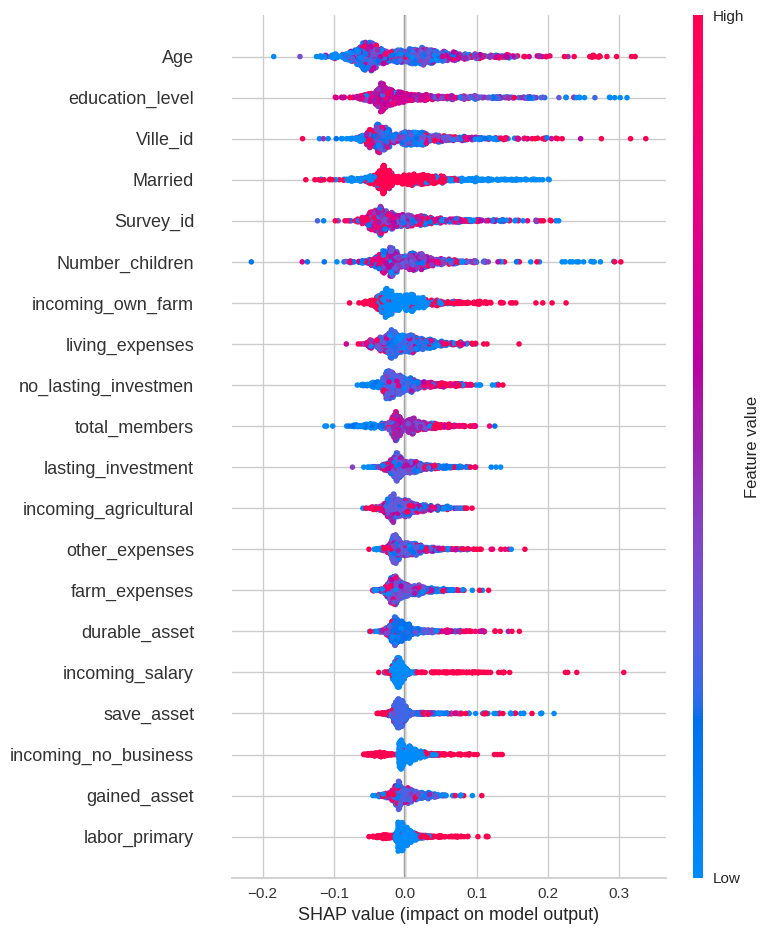

In [ ]:
# Visualize the SHAP values for all features
shap.summary_plot(shap_values, X_test)

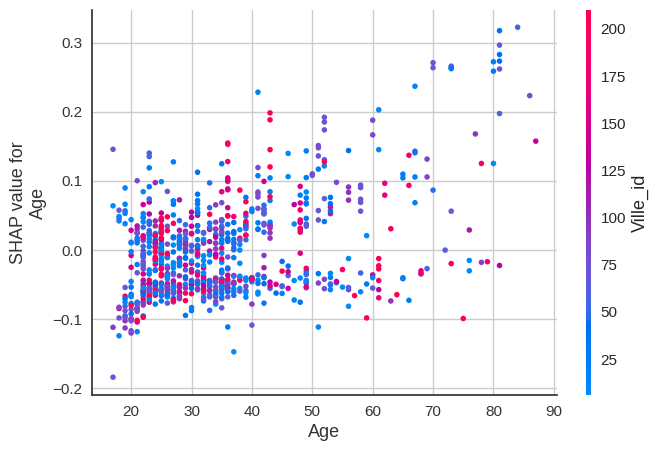

In [ ]:
# Visualize the SHAP values for a specific feature
shap.dependence_plot("Age", shap_values.values, X_test)

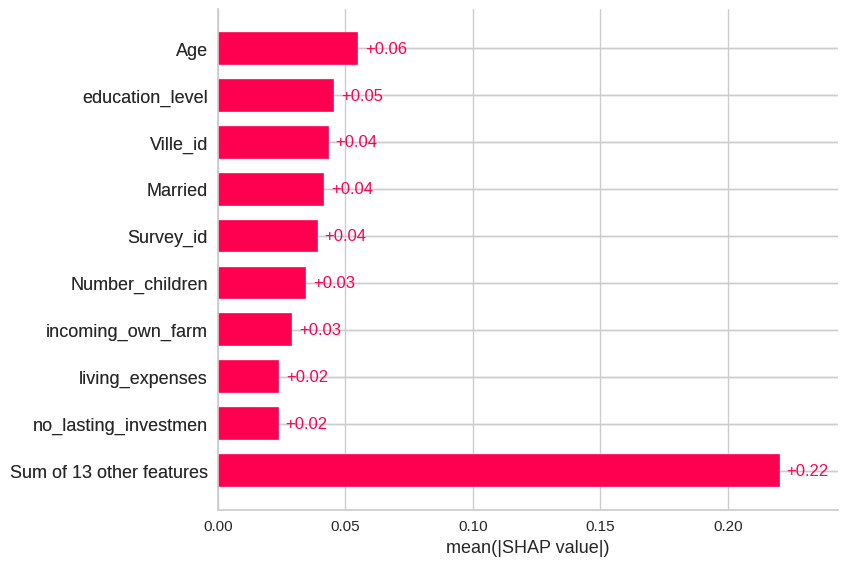

In [ ]:
shap.plots.bar(shap_values)

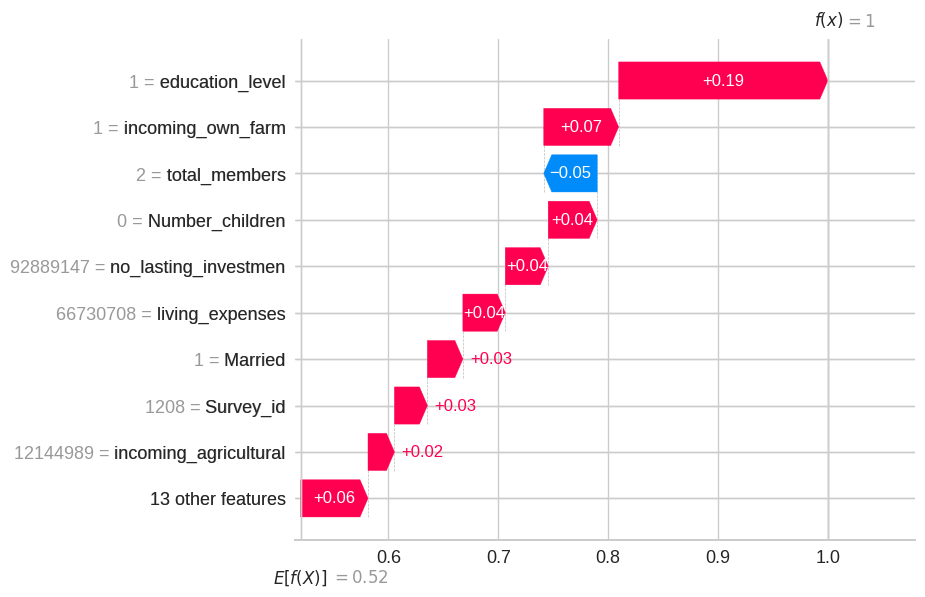

In [ ]:
shap.plots.waterfall(shap_values[0], max_display=10)

## LIME Local  Interpretable Model-agnostic Explanations

In [ ]:
!pip install lime

import lime
import lime.lime_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5f3139a634c99be51b65ce853502740fbfb793c4404799d05b3b12fc066af1b9
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
# Create a LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X.values,  # Use the NumPy array representation of X
    feature_names=X.columns.tolist(), # Feature names for interpretability
    class_names=['2', '4'], # Class names
    mode='classification' # or 'regression' depending on the task
)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Create an OrdinalEncoder instance with handle_unknown='use_encoded_value'
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit the encoder on your training data and transform both training and testing data
# This will convert your categorical features to numerical representations
X_encoded = encoder.fit_transform(X)

# Convert the encoded data back to DataFrames
X_encoded = pd.DataFrame(X_encoded, columns=X.columns, index=X.index)

# Create a LimeTabularExplainer with the encoded data
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_encoded.values,  # Use the encoded data
    feature_names=X_encoded.columns.tolist(), # Feature names for interpretability
    class_names=['0', '1'], # Class names, adjust if necessary
    mode='classification' # or 'regression' depending on the task
)

In [ ]:
# Choose an instance to explain
instance_index = 5 # Example: explain the first instance
instance = X.iloc[instance_index]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Create an OrdinalEncoder instance with handle_unknown='use_encoded_value'
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Separate features and target variable from upsampled data
X = df_upsampled.drop('depressed', axis=1)
y = df_upsampled['depressed']

# Fit the encoder on the upsampled data features
X_encoded = encoder.fit_transform(X)
X_encoded = pd.DataFrame(X_encoded, columns=X.columns, index=X.index)

# Create a LimeTabularExplainer with the encoded upsampled data
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_encoded.values,  # Use the encoded upsampled data
    feature_names=X_encoded.columns.tolist(),
    class_names=['0', '1'],  # Class names (assuming 0 and 1 for 'depressed')
    mode='classification',
    discretize_continuous=False # This line is added to avoid discretization
)

# Choose an instance to explain from the upsampled data
instance_index = 5
instance = X_encoded.iloc[instance_index]  # Use encoded instance from upsampled data

# Explain the instance
explanation = explainer.explain_instance(
    instance.values,
    lambda x: final_stacked.predict_proba(pd.DataFrame(x, columns=X_encoded.columns)),
    num_features=13
)

# Show the explanation
explanation.show_in_notebook(show_table=True)

In [ ]:
# Show the explanation
explanation.show_in_notebook(show_table=True)

In [ ]:
# Create a LimeTabularExplainer with the encoded upsampled data and disable discretization
explainer2 = lime.lime_tabular.LimeTabularExplainer(
    X_train_encoded.values,  # Use encoded training data
    feature_names=X_train_encoded.columns,
    class_names=['0', '1'],  # Assuming 0 and 1 for 'depressed' in upsampled data
    mode='classification',
    discretize_continuous=False  # Disable discretization for continuous features
)

# Choose another instance to explain from the upsampled data
instance_index_2 = 50  # Explain the 50th instance
instance_2 = X_test_encoded.iloc[instance_index_2]  # Use encoded instance from upsampled data

# Explain the second instance
# Removed: feature_selection='highest_weights' from explain_instance() call
explanation_2 = explainer2.explain_instance(
    instance_2.values,
    lambda x: final_stacked.predict_proba(pd.DataFrame(x, columns=X_train_encoded.columns)),
    num_features=13
)

In [ ]:
explanation_2.show_in_notebook(show_table=True)
explanation_2.as_list()

[('education_level', 0.03236028270874968),
 ('Survey_id', -0.008560381656203582),
 ('total_members', 0.007096146249386749),
 ('Married', 0.001924852045177902),
 ('Number_children', 0.001218820458368158),
 ('Ville_id', 0.0008377719105947943),
 ('durable_asset', 0.0007783491698099092),
 ('incoming_no_business', 0.0007517577181565451),
 ('incoming_agricultural', -0.0006175881861760714),
 ('incoming_own_farm', 0.0005138043878539671),
 ('other_expenses', 0.0004668781371957183),
 ('save_asset', 0.0004346302270103558),
 ('gained_asset', -0.0002437943713032475)]

# Ensemble Learning Approach

# Now we will try using Boosting, Bagging, and Voting and then choose the best model out of the 3 and implement both SHAP and LIME on that model.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, VotingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import shap
import lime
import lime.lime_tabular

In [ ]:
# Define base models
base_models = [
    ('dummy', DummyClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('sgd', SGDClassifier(loss='log_loss')),  # Change loss to 'log_loss'
    ('qda', QuadraticDiscriminantAnalysis()),
    ('et', ExtraTreesClassifier())
]

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

# Create an OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=X_train.columns, index=X_train.index)

# Transform the testing data using the same encoder
X_test_encoded = encoder.transform(X_test)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=X_test.columns, index=X_test.index)

# Create a SimpleImputer to replace NaN with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the encoded training data and transform both training and testing data
X_train_encoded = imputer.fit_transform(X_train_encoded)
X_test_encoded = imputer.transform(X_test_encoded)

# Now use the imputed encoded data for training
boosting_model = GradientBoostingClassifier()
boosting_model.fit(X_train_encoded, y_train) # Use X_train_encoded here
boosting_predictions = boosting_model.predict(X_test_encoded) # Use X_test_encoded here

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

# Create an OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=X_train.columns, index=X_train.index)

# Transform the testing data using the same encoder
X_test_encoded = encoder.transform(X_test)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=X_test.columns, index=X_test.index)

# Create a SimpleImputer to replace NaN with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the encoded training data and transform both training and testing data
X_train_encoded = imputer.fit_transform(X_train_encoded)
X_test_encoded = imputer.transform(X_test_encoded)

# Now use the imputed encoded data for training
bagging_model = BaggingClassifier(estimator=ExtraTreesClassifier())
bagging_model.fit(X_train_encoded, y_train) # Use X_train_encoded here
bagging_predictions = bagging_model.predict(X_test_encoded) # Use X_test_encoded here

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

# Create an OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=X_train.columns, index=X_train.index)

# Transform the testing data using the same encoder
X_test_encoded = encoder.transform(X_test)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=X_test.columns, index=X_test.index)

# Create a SimpleImputer to replace NaN with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the encoded training data and transform both training and testing data
X_train_encoded = imputer.fit_transform(X_train_encoded)
X_test_encoded = imputer.transform(X_test_encoded)

# Now use the imputed encoded data for training
voting_model = VotingClassifier(estimators=base_models, voting='soft')
voting_model.fit(X_train_encoded, y_train) # Use X_train_encoded here
voting_predictions = voting_model.predict(X_test_encoded) # Use X_test_encoded here

In [ ]:
# Evaluate the models (example using accuracy)
boosting_accuracy = accuracy_score(y_test, boosting_predictions)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
voting_accuracy = accuracy_score(y_test, voting_predictions)

print("Boosting Accuracy:", boosting_accuracy)
print("Bagging Accuracy:", bagging_accuracy)
print("Voting Accuracy:", voting_accuracy)

Boosting Accuracy: 0.8495684340320592
Bagging Accuracy: 0.9716399506781751
Voting Accuracy: 0.752157829839704


In [ ]:
# Choose the best model based on accuracy
best_model = None
best_accuracy = 0

if boosting_accuracy > best_accuracy:
    best_accuracy = boosting_accuracy
    best_model = boosting_model
    model_name = "Boosting"

if bagging_accuracy > best_accuracy:
    best_accuracy = bagging_accuracy
    best_model = bagging_model
    model_name = "Bagging"

if voting_accuracy > best_accuracy:
    best_accuracy = voting_accuracy
    best_model = voting_model
    model_name = "Voting"

print(f"\nBest Model: {model_name} with accuracy {best_accuracy}")


Best Model: Bagging with accuracy 0.9716399506781751


PermutationExplainer explainer: 812it [49:41,  3.68s/it]


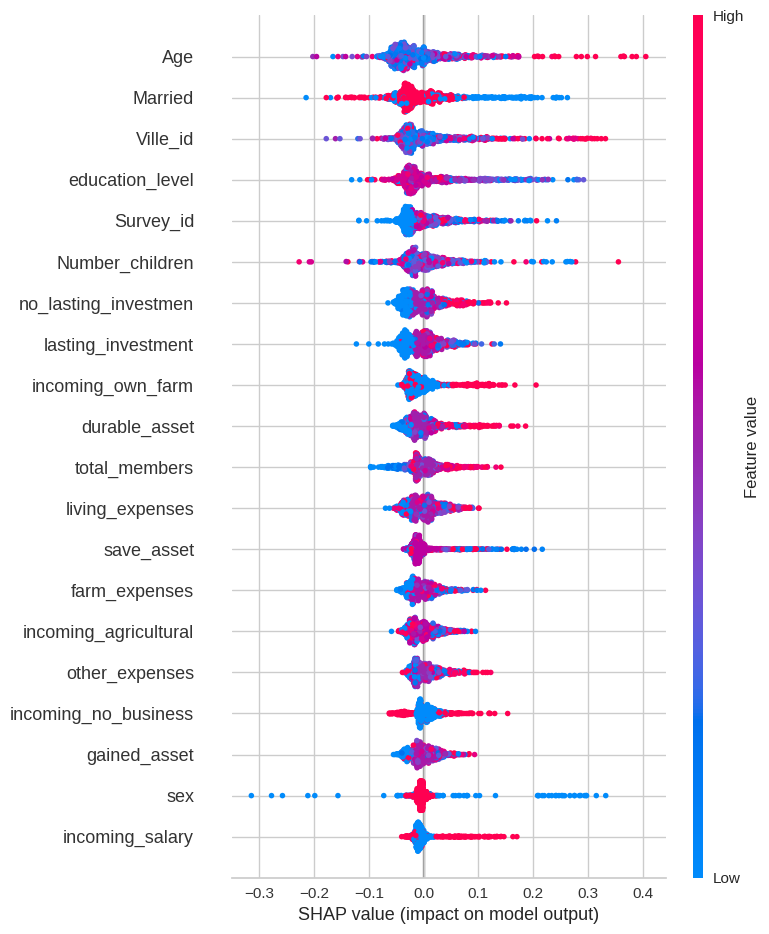

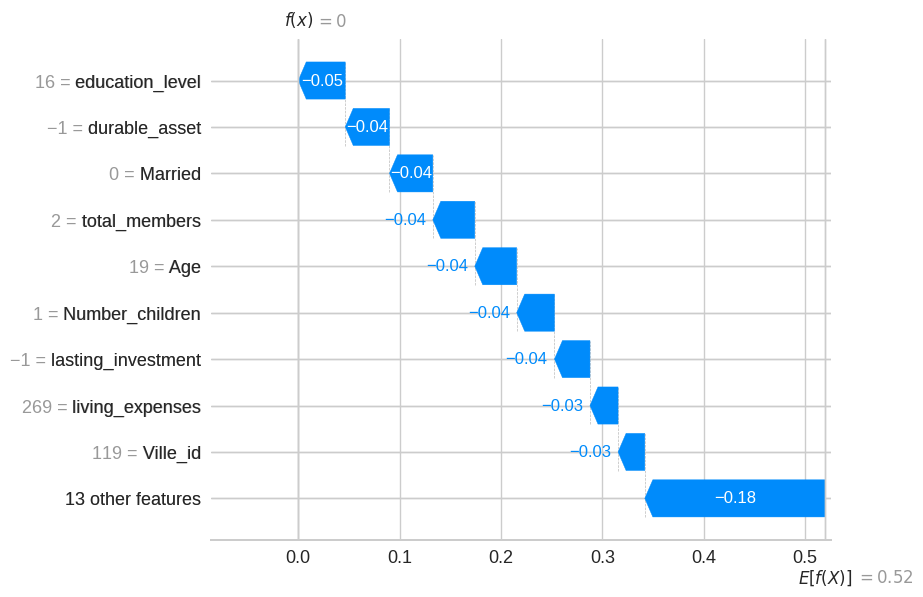

In [ ]:
# SHAP for the best model
# Preprocess the data before passing it to the SHAP explainer
X_train_encoded = encoder.transform(X_train)  # Encode categorical features
X_train_encoded = imputer.transform(X_train_encoded)  # Impute missing values
X_train_encoded = pd.DataFrame(X_train_encoded, columns=X_train.columns)

X_test_encoded = encoder.transform(X_test)  # Encode categorical features
X_test_encoded = imputer.transform(X_test_encoded)  # Impute missing values
X_test_encoded = pd.DataFrame(X_test_encoded, columns=X_test.columns)

# Create the explainer with the preprocessed training data
explainer = shap.Explainer(best_model.predict, X_train_encoded)

# Calculate SHAP values using the preprocessed testing data
shap_values = explainer(X_test_encoded)

# Continue with your SHAP visualization
shap.summary_plot(shap_values, X_test_encoded)
shap.plots.waterfall(shap_values[5])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Create an OrdinalEncoder instance with handle_unknown='use_encoded_value'
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit the encoder on your training data and transform both training and testing data
# This will convert your categorical features to numerical representations
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Convert the encoded data back to DataFrames
X_train_encoded = pd.DataFrame(X_train_encoded, columns=X_train.columns, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=X_test.columns, index=X_test.index)

# LIME for the best model using the encoded data
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_encoded.values,  # Use the encoded training data
    feature_names=X_train_encoded.columns,
    class_names=list(map(str, sorted(y_train.unique()))),
    mode='classification',
    discretize_continuous=False # Add this line to disable discretization
)

instance_index = 5
instance = X_test_encoded.iloc[instance_index] # Use the encoded instance from the test set
explanation = explainer.explain_instance(
    instance.values,
    best_model.predict_proba, # Assuming your best_model takes numerical input
    num_features=13
)
explanation.show_in_notebook(show_table=True)